## 问答题
1. 支持向量机的基本思想是什么？

找到最优的决策边界，使得不同类别之间的最大间隔

2. 什么是支持向量？

决策边界附近的样本点，决定边界范围。
训练完SVM后，支持向量就是位于街道上的任何实例，包括边界。决策边界完全由支持向量决定。任何非支持向量的实例都不会对决策边界产生任何影响；可以移除它们、添加更多实例或删除它们，只要不在街道上就不会影响决策边界。

3. 在使用 SVM 时，缩放输入值为什么很重要？

输入值大的会导致权重大，最终导致小特征发挥作用不明显
SVM尝试在类中找到仅可能大的间隔，因此，如果没有缩放输入值的话，SVM会倾向于忽略小的特征（最宽的街道接近水平，小的特征看起来不影响）

4. SVM 分类器在对实例进行分类时能输出置信度分数吗？概率呢？

可以使用decision_function获取置信度分数，这些分数表示实例与决策边界之间的距离。但置信度分数不能直接转化为类概率的估计值，但可以通过设置probability=True，适应predict_proba()方法得到概率

5. 你如何在 LinearSVC、SVC 和 SGDClassifier 之间进行选择？

LinearSVC实现线性SVM的优化算法，SGDClassifier使用梯度下降算法，两个类的复杂度为O(m*n),但SDGClassifier更灵活、支持增量学习。SVC类支持核技巧，能够处理非线性任务，但复杂度为O(m^2 * n)-O(m^3 * n)

6. 假设你已经使用 RBF 核训练了一个 SVM 分类器，但它似乎欠拟合训练集。
   你应该增大还是减小 γ（gamma）？C 呢？

应该增大gamma、增大C。增大gamma使得每个实例的影响范围变小（决策边界变得不规则）；C增大，惩罚更宽的边距，边距收缩降低过拟合。

7. ε 不敏感模型是什么意思？

回归SVM模型会尝试在预测模型的边界范围内（epsilon）拟合尽可能多的实例，训练后，在这个范围内添加实例，模型参数将完全不受影响，这个被叫做epsilon不敏感 -> 回归SVM模型的支持向量是边界范围外的实例。

8. 使用核技巧有什么意义？

训练非线性SVM模型，将输出映射到另一个空间，在高纬度的空间上训练数据

## 编程题
1. 在葡萄酒数据集上训练SVM分类器，可以使用sklearn.datasets.load_wine()加载它。该数据集包含3个不同种植者生产的178个葡萄酒样本的化学分析：目标是训练一个分类模型，该模型能够根据葡萄酒的化学分析预测种植者。由于SVM分类器是二元分类器，将需要使用“一对全部”对所有三个类进行分类。能达到的精度是多少？

   "一对全部"可以复习 **8_sklearn做分类.ipynb**里的笔记，里面提到了用二元分类器做多分类问题

---

In [7]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
X,y = wine.data,wine.target

In [9]:
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

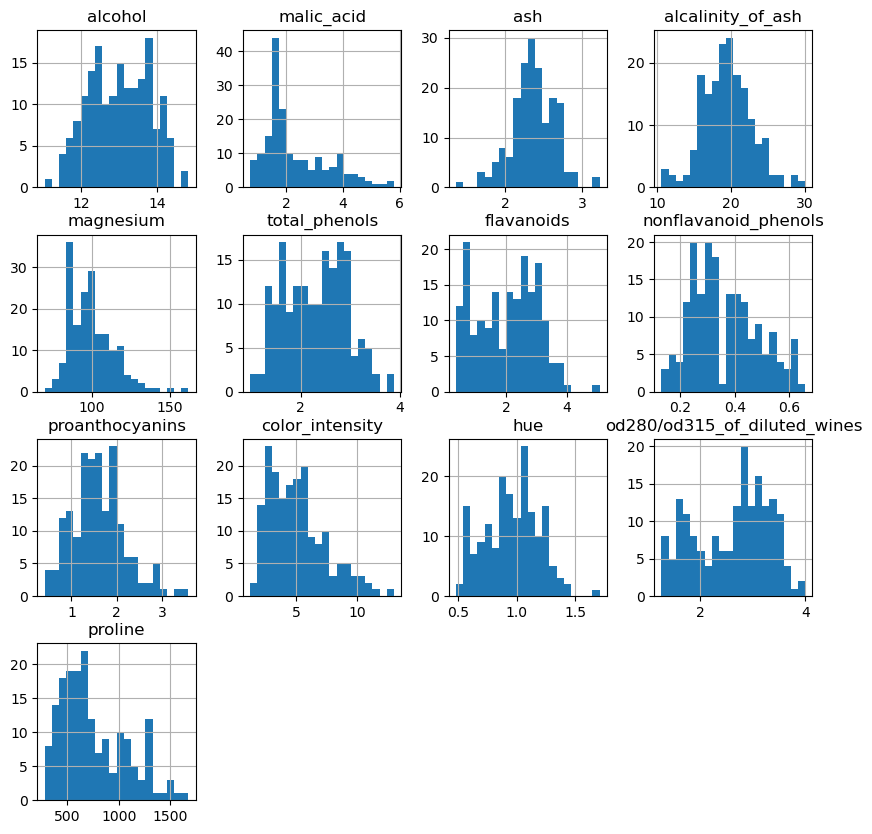

In [15]:
import matplotlib.pyplot as plt
X.hist(bins=20,figsize=(10,10))
plt.show()

In [22]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
svc_pl = make_pipeline(StandardScaler(),OneVsRestClassifier(SVC(random_state=42)))
svc_pl.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SVC(random_state=42)))])

In [30]:
from sklearn.metrics import accuracy_score
y_pred = svc_pl.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_pl,X,y,cv=5)

array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])

In [25]:
svc_pl.steps

[('standardscaler', StandardScaler()),
 ('onevsrestclassifier', OneVsRestClassifier(estimator=SVC(random_state=42)))]

In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = [
    {"onevsrestclassifier__estimator__kernel": ["rbf"],
     "onevsrestclassifier__estimator__gamma": ["scale", "auto", 1, 5, 25, 100],
     "onevsrestclassifier__estimator__C": np.logspace(-2, 2, 5),
     },

    {"onevsrestclassifier__estimator__kernel": ["sigmoid"],
     "onevsrestclassifier__estimator__C": np.logspace(-2, 2, 5),
     "onevsrestclassifier__estimator__gamma": ["scale", "auto", 1, 5, 25, 100],
     "onevsrestclassifier__estimator__coef0": [0,1,2]
    }
]

grid_search  = GridSearchCV(svc_pl, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('onevsrestclassifier',
                                        OneVsRestClassifier(estimator=SVC(random_state=42)))]),
             param_grid=[{'onevsrestclassifier__estimator__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'onevsrestclassifier__estimator__gamma': ['scale',
                                                                    'auto', 1,
                                                                    5, 25,
                                                                    100],
                          'onevsrestclassifier__estimator__kernel': ['rbf']},
                         {'onevsrestclassifier__estimator__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'onevsrestclassifier__estimator__coef0': [0, 1, 2],
                          'onevsrestclassifier__estimator__gamma': ['scale',
                                                                    'auto', 1,
                                                                    5, 25,
                                                                    100],
                          'onevsrestclassifier__estimator__kernel': ['sigmoid']}],
             scoring='accuracy')

In [29]:
best_model = grid_search.best_estimator_
accuracy_score(y_test,best_model.predict(X_test))

0.9722222222222222

2. 提前预习 **10_支持向量机.ipynb** 最新更新的笔记 （把SVM分类用梯度下降实现）； 大概理解笔记后，尝试自己对照笔记 实现用梯度下降实现SVM分类

   并把自定义的SVM分类用于 iris data(鸢尾花数据)； 取花瓣长度 和 花瓣宽度特征， 分类 看是不是 分类2的花 （(iris.target == 2)

   对比下sklearn自带的SVM分类 和 自定义SVM分类 实现的分类效果


In [40]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 2  # 二元分类问题

In [41]:
from sklearn.base import BaseEstimator


class MyLinearSVC(BaseEstimator):
    def __init__(self,C,eta0,n_epochs=1000,random_state=None):
        self.C = C
        self._alpha = 1/(2*C)
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
    @property
    def eta(self):
        return self.eta0
    def fit(self,X,y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1],1)
        b = 0
        m = X.shape[0]
        t = np.array(y,dtype=np.float64).reshape(-1,1) *2 -1
        self.Js = []

        for epoch in range(self.n_epochs):
            support_vectors_idx = ((X@w + b)<1).ravel()

            X_sv = X[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = (np.sum(w*w) * self._alpha + np.sum(1-t_sv * (X_sv @ w +b ))) / m
            self.Js.append(J)

            w_gradient_vector = (2 * self._alpha *w - X_sv.T @ t_sv) / m
            b_gradient_vector = -np.sum(t_sv) / m

            w -= self.eta * w_gradient_vector
            b -= self.eta * b_gradient_vector

        self.intercept_ = b
        self.coef_ = w
        support_vectors_idx = ((X@w+b)*t<1).ravel()
        self.support_vectors_ = X[support_vectors_idx]

        return self
    def decision_function(self, X):
        return np.dot(X, self.coef_) + self.intercept_  # wx+b

    def predict(self, X):
        return self.decision_function(X) >= 0

In [60]:
C = 1
my_linearSVC = make_pipeline(StandardScaler(), MyLinearSVC(C=C, eta0 =0.01, n_epochs=500, random_state=42))
my_linearSVC.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mylinearsvc',
                 MyLinearSVC(C=1, eta0=0.01, n_epochs=500, random_state=42))])

In [61]:
from sklearn.svm import LinearSVC
linear_svc = make_pipeline(StandardScaler(), LinearSVC( C=1, dual=True, random_state=42,max_iter=500))
linear_svc.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1, dual=True, max_iter=500, random_state=42))])

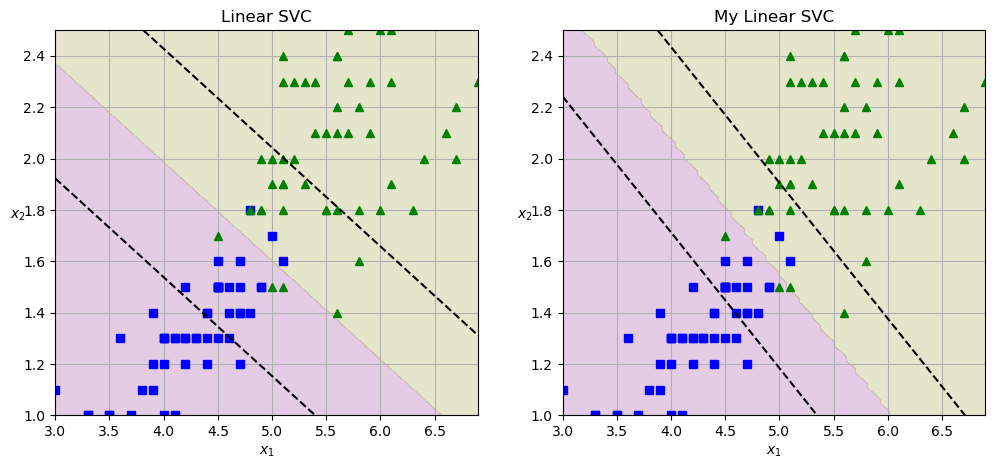

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    # axes： 坐标轴的范围，列表
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    # axes: 坐标轴的范围，列表, [x上界，x下界, y轴上界,y轴下界]
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)                     # y_pred.shape: (100,100)  里面全都是预测的分类
    y_decision = clf.decision_function(X).reshape(x0.shape)       # y_decision.shape:(100,100) 里面全都是预测的分数（相对于决策线的距离）
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)  # 根据每个网格点的预测分类（+1 或 -1），用不同颜色填充区域。颜色分界线就是 SVM 的分类边界。
    # plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=1)
    plt.contour(x0, x1, y_decision, levels=[-1, 1], colors='k', linestyles=['--',  '--']) # 画间隔，间隔 根据决策分数=+1/-1决定
axes = [3, np.max(X[:, 0]), 1,np.max(X[:,1])]
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plot_dataset(X,y, axes)
plot_predictions(linear_svc, axes=axes)
plt.title("Linear SVC")

plt.subplot(1,2,2)
plot_dataset(X,y, axes)
plot_predictions(my_linearSVC, axes=axes)
plt.title("My Linear SVC")

plt.show()



3. 在加州房屋数据集上训练和微调SVM回归器。可以使用原始数据集而不是 在课上使用的调整后的版本，
可以使用sklearn.datasets.fetch_california_housing()加载它。目标代表了数十万美元。
由于有超过20000个实例，SVM可能会很慢，因此对于超参数调整，应该使用更少的实例（例如2000个）来测试更多的超参数组合。最佳模型的RMSE是多少？


In [31]:
import pandas as pd
housing = pd.read_csv("data/california_housing_train.csv")
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
# 把之前的预处理搬过来， 做点调整
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.cluster import KMeans

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out （输出特征的名字）

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),  # one-to-one: 1比1映射
    StandardScaler())


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # KMeans估计器相关参数：集群数量，随机种子，KMeans是一个随机算法，依赖随机性来定位集群
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)

        # sample_weight可指定样本的相对权重, 属于KMeans算法里的超参数，训练前指定。
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # 永远返回self

    def transform(self, X):
        # self.kmeans_.cluster_centers_ 集群中心的位置
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())


preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", default_num_pipeline, ["latitude", "longitude"]),  # 直接用地理位置特征，不再预处理
    ], remainder=default_num_pipeline)


In [33]:
from sklearn.model_selection import train_test_split

housing_features, housing_labels = housing.iloc[:, :-1], housing.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_labels, random_state=42, test_size=0.2, shuffle=True,
                 stratify=pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]))

In [34]:
# 验证分层采样的结果
pd.cut(X_train["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]).value_counts() / len(X_train)
pd.cut(X_test["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]).value_counts() / len(X_test)

median_income
3    0.348235
2    0.318235
4    0.178235
5    0.116176
1    0.039118
Name: count, dtype: float64

In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, randint, alpha

svr_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svr", SVR())
])

rnd_search = RandomizedSearchCV(svr_pipeline, param_distributions={
    "svr__kernel": ["rbf", "linear"],
    "svr__gamma": expon(scale=1),
    "svr__C": np.logspace(-2, 5, 50),
    "svr__epsilon": np.logspace(-1, 1, 50)
}, n_iter=80, scoring="neg_mean_squared_error", cv=3)

rnd_search.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ]),
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002734B8B9690>,
                                        'svr__kernel': ['rbf', 'linear']},
                   scoring='neg_mean_squared_error')

In [38]:
from sklearn.metrics import mean_squared_error

best_model = rnd_search.best_estimator_
y_pred = best_model.predict(X_test)
mean_squared_error(y_test, y_pred,squared=False)

198123.38285075914